# Ejercicio 4.
Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados.

Ejercicio 4.1 Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [73]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [74]:
using SymPy

In [75]:
x=symbols("x")

x

In [76]:
f(x)=cos(x)

f (generic function with 1 method)

In [77]:
listx=linspace(0,2pi,10)

0.0:0.6981317007977318:6.283185307179586

In [78]:
length(listx)

10

In [79]:
collect(listx)

10-element Array{Float64,1}:
 0.0     
 0.698132
 1.39626 
 2.0944  
 2.79253 
 3.49066 
 4.18879 
 4.88692 
 5.58505 
 6.28319 

In [80]:
cos(listx)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [5] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [6] (::IJulia.##11#14)() at ./task.jl:335
while loading In[80], in expression starting on line 1


10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [81]:
listy=cos(listx)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [5] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [6] (::IJulia.##11#14)() at ./task.jl:335
while loading In[81], in expression starting on line 1


10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [82]:
using PyPlot

In [83]:
function bases_inter(index,listx) #Las entradas de la función corresponden a un índice del producto y a los valores de listx
    l=1
    for i = 1:length(listx) #Con un for iteramos todos los productos de cada l
         if i != index #Con un if diferenciamos los índices para evitar errores de elección de términos
            l = l*(Sym("x")-listx[i])/(listx[index]-listx[i]) #l recibe cada iteración la guarda y la multiplica por el anterior                                                              y asi sucesivamente con los demas terminos
         end
    end
    return l #Devuelve la función l
end

bases_inter (generic function with 1 method)

In [84]:
bases_inter(10,listx) #Se hizo una prueba y con ello se obtuvo la décima base interpoladora

6.99520967905925e-5*x*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.188
79020478639)*(x - 3.49065850398866)*(x - 2.79252680319093)*(x - 2.094395102393
2)*(x - 1.39626340159546)*(x - 0.698131700797732)

In [85]:
function Lagrange(listx,listy) #La entrada van los valores de x y de la función f(x) evaluada en cada punto
    L=0
    for i = 1:length(listy) #Se itera el proceso de tomar para obtner el polinomio interpolador
       L = L +bases_inter(i,listx)*listy[i] #L recibe los términos de la iteración los guarda y se los va sumando al término                                                 anterior y asi sucesivamente.
    end
    return expand(L) #Devuelve el polinomio interpolado
end

Lagrange (generic function with 1 method)

In [86]:
Lagrange(listx,listy) #Se muestra el polinomio interpolado

                      9                        8                         7    
7.42678488152571e-18*x  - 1.97979336359812e-5*x  + 0.000497576342935013*x  - 0

                    6                        5                       4        
.00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.020

               3                      2                              
1425548285172*x  - 0.512543349763863*x  + 0.00313254720749789*x + 1.0

In [87]:
z=linspace(0,6.3,1000) #Se declara una variable que va ir tomando valores de un intervalo dado por la función linspace.

0.0:0.006306306306306306:6.3

In [88]:
y=Lagrange(listx,listy).(z) #Se evalua la función interpoladora en z y se genera una lista.

1000-element Array{SymPy.Sym,1}:
  1.00000000000000
 0.999999376300225
 0.999958016268500
 0.999875951616215
 0.999753215000754
 0.999589840035540
 0.999385861299922
 0.999141314348853
 0.998856235722407
 0.998530662955109
 0.998164634585078
 0.997758190163003
 0.997311370260939
                 ⋮
 0.998752101541740
 0.999050696075983
 0.999308771347966
 0.999526290486827
 0.999703217609998
 0.999839517813708
 0.999935157163215
 0.999990102683277
  1.00000432234809
 0.999977785070783
 0.999910460693538
 0.999802319976538

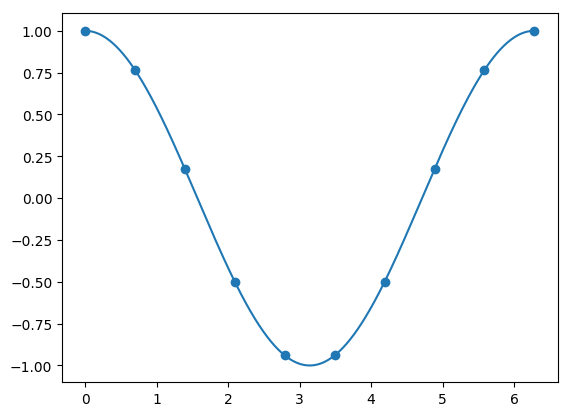

In [89]:
#La gráfica se presenta el polinomio interpolado y los diez puntos por los cuales pasa esta función, que a su vez correponden también a la función de coseno.
scatter(listx,listy)
plot(z,y)
show()

Ejercicio 4.2 Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.

In [90]:
listA=[0,2,3,4,5,6,7]

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [91]:
listB=[10,-10,-4,0,5,20,-1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [92]:
using PyPlot

In [93]:
function bases_inter(index,list)
    l=1
    for i = 1:length(listA)
         if i != index
            l = l*(Sym("x")-listA[i])/(listA[index]-listA[i])
         end
    end
    return l
end

bases_inter (generic function with 1 method)

In [94]:
bases_inter(1,listA)

 /  x    \                                         
-|- - + 1|*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3) 
 \  2    /                                         
---------------------------------------------------
                        2520                       

In [95]:
function Lagrange(listA,listB)
    L=0
    for i = 1:length(listB)
       L = L +bases_inter(i,listA)*listB[i]
    end
    return expand(L)
end

Lagrange (generic function with 1 method)

In [96]:
Lagrange(listA,listB)

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

In [97]:
s=linspace(0,7,1000)

0.0:0.007007007007007007:7.0

In [98]:
g=Lagrange(listA,listB).(s)

1000-element Array{SymPy.Sym,1}:
                 10
   10.0394262466183
   10.0746663599347
   10.1057866004494
   10.1328526650804
   10.1559296898754
   10.1750822527183
   10.1903743760299
   10.2018695294616
   10.2096306325850
   10.2137200575744
   10.2141996318836
   10.2111306409173
                  ⋮
   5.19145509907139
   4.67897282951526
   4.15673663903181
   3.62464083045052
   3.08257897017029
   2.53044388506169
   1.96812765934737
   1.39552163162625
  0.812516391681129
  0.219001777448284
 -0.385133128082089
  -1.00000000000000

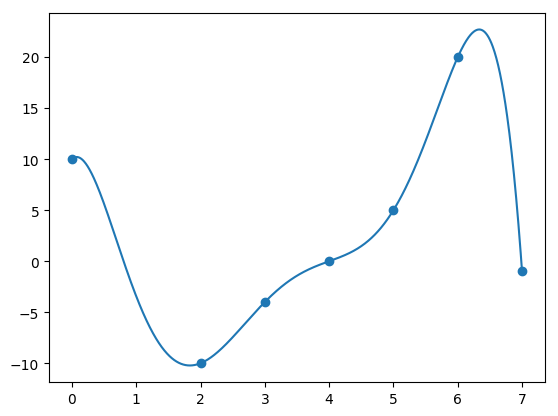

In [99]:
#La gráfica se presenta el polinomio interpolado y los diez puntos por los cuales pasa esta función.
scatter(listA,listB)
plot(s,g)
show()

Ejercicio 4.3 Interpole la función $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [100]:
x=symbols("x")

x

In [101]:
listu=linspace(0,2pi,10)

0.0:0.6981317007977318:6.283185307179586

In [102]:
collect(listu)

10-element Array{Float64,1}:
 0.0     
 0.698132
 1.39626 
 2.0944  
 2.79253 
 3.49066 
 4.18879 
 4.88692 
 5.58505 
 6.28319 

In [103]:
listv=[1,0.586823,0.030154,0.250004,0.88302,0.88302,0.2500001,0.030153,0.58682,1]

10-element Array{Float64,1}:
 1.0     
 0.586823
 0.030154
 0.250004
 0.88302 
 0.88302 
 0.25    
 0.030153
 0.58682 
 1.0     

In [104]:
using PyPlot

In [105]:
function bases_inter(index,list)
    l=1
    for i = 1:length(listu) 
         if i != index 
            l = l*(Sym("x")-listu[i])/(listu[index]-listu[i]) 
         end
    end
    return l 
end

bases_inter (generic function with 1 method)

In [106]:
bases_inter(10,listu) 

6.99520967905925e-5*x*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.188
79020478639)*(x - 3.49065850398866)*(x - 2.79252680319093)*(x - 2.094395102393
2)*(x - 1.39626340159546)*(x - 0.698131700797732)

In [107]:
function Lagrange(listu,listv)
    L=0
    for i = 1:length(listv)
       L = L +bases_inter(i,listu)*listv[i]
    end
    return expand(L)
end

Lagrange (generic function with 1 method)

In [108]:
Lagrange(listu,listv)

                     9                        8                       7       
2.22867380362222e-8*x  + 0.00125532243837299*x  - 0.0315580319419209*x  + 0.31

               6                     5                     4                  
3435717749841*x  - 1.54730511016104*x  + 3.89843478020429*x  - 4.5687957224779

   3                     2                            
4*x  + 2.02175038771179*x  - 0.783859937606713*x + 1.0

In [109]:
w=linspace(0,6.3,1000)

0.0:0.006306306306306306:6.3

In [110]:
I=Lagrange(listu,listv).(w)

1000-element Array{SymPy.Sym,1}:
  1.00000000000000
 0.995136003435326
 0.990426025644643
 0.985863411206347
 0.981441649005128
 0.977154370415282
 0.972995347498029
 0.968958491212779
 0.965037849642273
 0.961227606231547
 0.957522078040652
 0.953915714011069
 0.950403093245749
                 ⋮
 0.963743836282364
 0.967628061586441
 0.971626602047198
 0.975745365836804
 0.979990397655318
 0.984367880564226
 0.988884137719940
 0.993545634227351
 0.998358978900603
  1.00333092611301
  1.00846837765244
  1.01377838454390

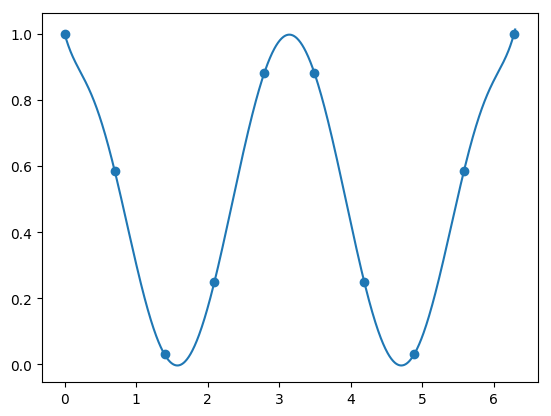

In [111]:
#La gráfica se presenta el polinomio interpolado y los diez puntos por los cuales pasa esta función, que a su vez correponden también a la función de cos^2(x).
scatter(listu,listv)
plot(w,I)
show()

# Ejercicio 5.
Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

In [112]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [113]:
using SymPy

In [114]:
x=symbols("x")

x

In [115]:
F(x)=-sin(x)

F (generic function with 1 method)

In [116]:
F(x)

-sin(x)

In [117]:
a=linspace(0,2pi,2000)

0.0:0.003143164235707647:6.283185307179586

In [118]:
b=linspace(0,2pi,2000)

0.0:0.003143164235707647:6.283185307179586

In [119]:
function Metodo_del_rectangulo(F,a,b,n) # n es la partición del subintervalo
      i=1 
    I=0 #Se inicia la suma en I=0
    for i in 1:length(a)-1 #Se utilizó un for para ir iterando los valores de los subintervalos tomados de los intervalos a y b
        u=a[i] # u corresponde al límite inferior del subintervalo [u,v] y a[] localiza al primer elemento del subintervalo.
        v=b[i+1] # v es el límte superior del subintervalo y b[i+1] incrementa en 1 al valor anterior y con ello localiza al                       segundo elemento del subintervalo, y así sucesivamente para todos los demás.
        I=I+((v-u)/n)*F((u+v)/2) #La aproximación a la integral por este método, ésta dada por la fórmula I. 
    end
        return I #Devuelve el valor de la integral como la suma de todos los rectángulos de diferencia finita.
    
end
    

Metodo_del_rectangulo (generic function with 1 method)

In [120]:
Metodo_del_rectangulo(F,a,b,100000)

6.507332943726635e-21

In [121]:
n=linspace(10000,1000000,10)

10000.0:110000.0:1.0e6

In [122]:
listj=Metodo_del_rectangulo(F,a,b,n)

10-element Array{Float64,1}:
  5.75314e-20
 -1.95787e-21
 -9.82609e-21
  5.97288e-21
 -4.88974e-23
 -3.9851e-21 
  2.32287e-21
  3.7367e-21 
  1.1042e-22 
  1.65648e-21

Obs: En esta parte se obtuvo $1/\Delta x$ con una función que permitió obtener una lista de cada partición.

In [123]:
G(x)=1/x

G (generic function with 1 method)

In [124]:
G(x)

1
-
x

In [125]:
function Dif(G,a,b,n)
    i=1
    D=0
    
    for i in 1:length(a)-1 #Se utilizó un for para iterar el cálculo de la función D
        z=a[i] #Toma del intervalo a un valor en i
        y=b[i+1] #Toma el siguiente valor i+1 en el intervalo b
        D=n/G(y-z) #Con esta variable se obtuvieron las diferencias finitas de cada subintervalo
        
    end
    return D
end

Dif (generic function with 1 method)

In [126]:
Dif(G,a,b,n)

31.431642357073734:345.7480659278111:3143.164235707374

In [127]:
listk=Dif(G,a,b,n)

31.431642357073734:345.7480659278111:3143.164235707374

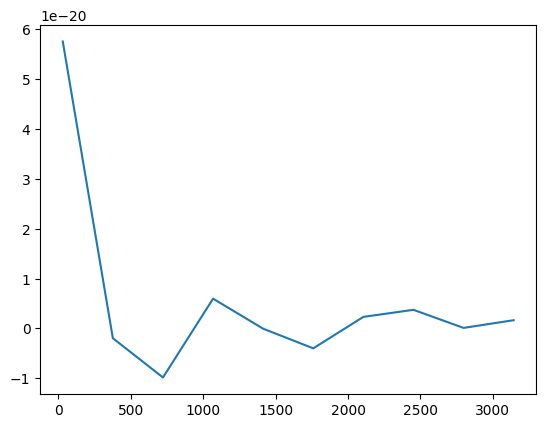

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f803cae7a50>

In [128]:
plot(listk,listj)

En esta gráfica se observa como varía la aproximación de la integral conforme va disminuyendo la partición, por lo que al ser $1/\Delta x$ muy grande implica que $\Delta x$ se aproxima a cero, esto nos indica que la partición se va haciendo cada vez más fina y como consecuencia la aproximación al valor de la integral aumenta

In [129]:
function Metodo_del_trapecio(F,a,b,n)
    i=1
    I=0 #Se inicia la suma en I=0
    for i in 1:length(a)-1 #Se usó un for para iterar los valores del subintervalo, ya que estos valores serán usados en la suma                            de las áreas de todos los trapecios.
        p=a[i] # p es el límite superior del subintervalo 
        q=b[i+1] # q es el límite inferior del subintervalo
        I=I+((q-p)/n)*((F(p)+F(q))/2) # I corresponde a la suma de todas las áreas de los trapecios.
    end
    return I #Devuelve el valor de la integral
end

Metodo_del_trapecio (generic function with 1 method)

In [130]:
Metodo_del_trapecio(F,a,b,n)

10-element Array{Float64,1}:
 -2.00637e-19
 -1.50754e-20
 -6.28474e-21
  1.39526e-21
 -2.11547e-22
  2.37178e-21
 -5.39241e-22
 -3.7892e-23 
  2.64882e-22
  1.60535e-21

In [131]:
listR=Metodo_del_trapecio(F,a,b,n)

10-element Array{Float64,1}:
 -2.00637e-19
 -1.50754e-20
 -6.28474e-21
  1.39526e-21
 -2.11547e-22
  2.37178e-21
 -5.39241e-22
 -3.7892e-23 
  2.64882e-22
  1.60535e-21

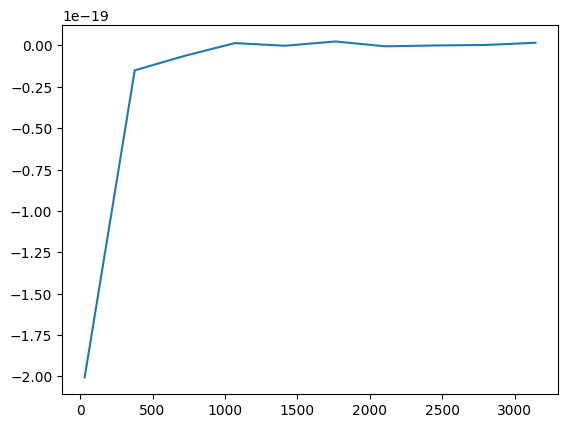

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f803d045c50>

In [132]:
plot(listk,listR)

En esta grafica observamos que conforme $1/\Delta x$ aumenta la aproximación a la integral va tendiendo a cero, el cual corresponde al valor de la integral de -sin(x) en el intervalo [0,2pi]. Este método da una mejor aproximación al valor de la integral.

In [133]:
function Metodo_Simpson(F,a,b,n)
    i=1
    I=0
    for i in 1:length(a)-1 #Con el uso de for se iteraron los valores del subintervalo para que la fórmula I los tome y los                                 evalue.
        e=a[i] # a corresponde al límite inferior del subintervalo
        m=b[i+1] # b es el límite superior del subintervalo
        I=I+(((m-e)/n)/6)*(F(e)+4*F((e+m)/2)+F(m)) 
        #Consideramos el polinomio interpolador de orden dos que aproxima a lafunción                                                   integrando f(x) en los puntos a y b. Aplicando el método de interpolación de                                                     Lagrange, que para tres puntos interpola con un polinomio de grado 2 se obtiene                                                 la fórmula I.
    end
    return I #Devueleve el valor de I
end

Metodo_Simpson (generic function with 1 method)

In [134]:
Metodo_Simpson(F,a,b,n)

10-element Array{Float64,1}:
  2.67432e-20
  6.28328e-21
 -1.22958e-21
  4.96539e-21
  1.32331e-22
 -1.27058e-21
 -4.74436e-21
  1.79487e-21
 -8.84571e-22
 -1.11883e-22

In [135]:
listM=Metodo_Simpson(F,a,b,n)

10-element Array{Float64,1}:
  2.67432e-20
  6.28328e-21
 -1.22958e-21
  4.96539e-21
  1.32331e-22
 -1.27058e-21
 -4.74436e-21
  1.79487e-21
 -8.84571e-22
 -1.11883e-22

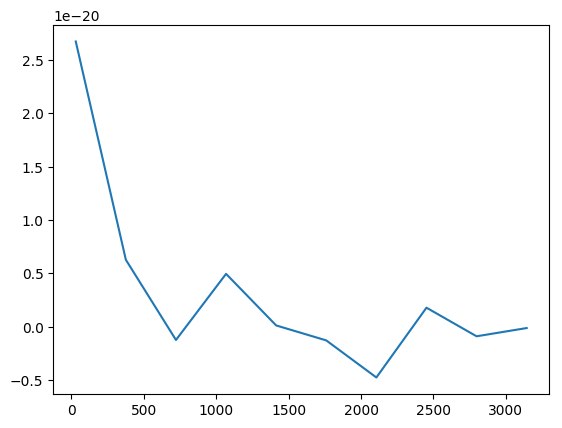

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f803d0ce310>

In [136]:
plot(listk,listM)

En esta ultima gráfica a diferencia de las otras tiene un comportamiento parecido al metodo del rectangulo, vemos que no todos los puntos tienden al cero y esto es por el error que conlleva cada métdodo.